In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
from pylab import *
from sklearn.model_selection import train_test_split

import os
if not os.path.exists("output/") : os.mkdir("output/")
if not os.path.exists("data/") : os.mkdir("data/")

import warnings
warnings.filterwarnings("ignore")

In [245]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import log_loss

In [65]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [66]:
X_train

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9
...,...,...,...,...,...,...,...,...
85746,4,404,2.1,0,0.9,22.1,3,6.5
85747,1,211,0.9,2,2.5,5.1,2,2.1
85748,4,627,18.3,0,1.8,25.4,3,4.3
85749,2,229,2.0,1,2.5,14.5,2,1.4


## Importing model from sklearn

In [269]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

## Preprocessing

In [211]:
from sklearn.preprocessing import OneHotEncoder

Spliting training data and validation data

In [73]:
xx_train, xx_test, yy_train, yy_test = train_test_split(
        X_train, y_train, test_size=0.3, random_state=0)

Dropping the rows with negative values

In [79]:
drop_neg_xx_train=xx_train.drop(xx_train[xx_train['TOUCH_TIME']<0].index)
drop_neg_yy_train=yy_train.drop(xx_train[xx_train['TOUCH_TIME']<0].index)

In [80]:
drop_neg_xx_test=xx_test.drop(xx_test[xx_test['TOUCH_TIME']<0].index)
drop_neg_yy_test=yy_test.drop(xx_test[xx_test['TOUCH_TIME']<0].index)

Try One Hot encoder

In [236]:
en_drop_neg_xx_train=pd.get_dummies(drop_neg_xx_train,columns=['PERIOD','PTS_TYPE'])

In [237]:
en_drop_neg_xx_test=pd.get_dummies(drop_neg_xx_test,columns=['PERIOD','PTS_TYPE'])

In [238]:
en_drop_neg_xx_test

,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,CLOSE_DEF_DIST,PERIOD_1,PERIOD_2,PERIOD_3,PERIOD_4,PERIOD_5,PERIOD_6,PERIOD_7,PTS_TYPE_2,PTS_TYPE_3
48595,513,21.3,0,1.8,5.6,3.6,1,0,0,0,0,0,0,1,0
33581,44,17.5,1,1.8,13.9,6.4,0,0,1,0,0,0,0,1,0
80254,136,24.0,0,0.8,3.2,0.0,0,1,0,0,0,0,0,1,0
15827,624,4.6,0,0.9,24.1,5.9,1,0,0,0,0,0,0,0,1
43292,267,7.4,1,3.0,4.4,1.7,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68897,641,14.8,0,0.9,11.7,3.1,0,0,0,1,0,0,0,1,0
78791,176,3.7,2,4.7,8.2,0.9,0,1,0,0,0,0,0,1,0
70531,312,17.2,0,1.2,24.0,6.6,0,0,0,1,0,0,0,0,1
19791,379,6.6,0,4.9,15.4,5.4,1,0,0,0,0,0,0,1,0


### Testing OneHotEncoder

In [240]:
rfr = RandomForestClassifier(max_depth=4, random_state=0)
rfr.fit(en_drop_neg_xx_train, drop_neg_yy_train)
yy_pred=rfr.predict(en_drop_neg_xx_test)
print(accuracy_score(drop_neg_yy_test, yy_pred))
print(f1_score(drop_neg_yy_test, yy_pred))

0.6102863822326126
0.45019788918205805


### GradientBoost

In [242]:
gboosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1,max_depth=1, random_state=0).fit(en_drop_neg_xx_train, drop_neg_yy_train)
yy_pred=gboosting_clf.predict(en_drop_neg_xx_test)
print(accuracy_score(drop_neg_yy_test, yy_pred))
print(f1_score(drop_neg_yy_test, yy_pred))

0.611104617182934
0.4932216298552932


The results show that the difference is small between with and without One-Hot encoder

### Feature selection

#### Feature selection by logistic regression

In [82]:
xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)
lgr = LogisticRegression(random_state=0,penalty='l1',solver='liblinear')
lgrfit=lgr.fit(xx_train,yy_train)

In [83]:
epsilon = 6e-2
idxs = np.where(abs(lgrfit.coef_) > epsilon)
print('Selected attributes: {}'.format(X_train.columns.values[idxs[1]]))

Selected attributes: ['SHOT_DIST' 'PTS_TYPE' 'CLOSE_DEF_DIST']


#### Feature selection by SelectKBest, chi2

In [246]:
from sklearn.feature_selection import SelectKBest, chi2

In [248]:
selector=SelectKBest(chi2, k=3)
xx_train_new = selector.fit_transform(drop_neg_xx_train, drop_neg_yy_train)
sel_name_id=selector.get_support(indices=True)
#drop_neg_xx_train.columns[sel_name_id]
#sel_train_xx=drop_neg_xx_train.iloc[:,sel_name_id]
#sel_test_xx=xx_test.iloc[:,sel_name_id]

In [251]:
drop_neg_xx_train.columns.values[sel_name_id]

array(['SHOT_CLOCK', 'TOUCH_TIME', 'SHOT_DIST'], dtype=object)

In [194]:
from itertools import combinations
  
def rSubset(arr, r):
  
    # return list of all subsets of length r
    # to deal with duplicate subsets use 
    # set(list(combinations(arr, r)))
    return list(combinations(arr, r))

# 1. How you evaluate your model.

Using accuracy and F1-score

# 2. All models you have tried and the corresponding results.

## Models:

### SVM

In [243]:
rbf_svc = SVC(kernel='rbf',cache_size=1000)

In [244]:
rbf_svc.fit(en_drop_neg_xx_train, drop_neg_yy_train)
yy_pred=rbf_svc.predict(en_drop_neg_xx_test)
print(accuracy_score(drop_neg_yy_test, yy_pred))
print(f1_score(drop_neg_yy_test, yy_pred))

0.5974673680109098
0.5372037808538279


### GradientBoostingClassifier

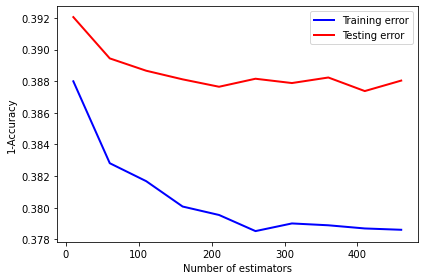

   No. estimators  Accuracy  F1 scores
0            10.0  0.607949   0.477299
1            60.0  0.610559   0.490493
2           110.0  0.611338   0.491305
3           160.0  0.611884   0.491137
4           210.0  0.612351   0.492061
5           260.0  0.611845   0.490643
6           310.0  0.612118   0.492221
7           360.0  0.611767   0.492358
8           410.0  0.612624   0.493737
9           460.0  0.611962   0.492535


In [120]:
lls_train = []
lls_test = []

max_ = 500
min_ = 10
sc_df = pd.DataFrame(columns = ['No. estimators', 'Accuracy', 'F1 scores'])
itr_range=range(min_, max_,50)

for h in itr_range:
    learning_rate=1
    gboosting = GradientBoostingClassifier(n_estimators=h, learning_rate=learning_rate,max_depth=1, random_state=0)
    
    gboosting_m = gboosting.fit(drop_neg_xx_train, drop_neg_yy_train)
    y_train_pred = gboosting_m.predict(drop_neg_xx_train)
    y_test_pred = gboosting_m.predict(drop_neg_xx_test)
    sc_df = sc_df.append({'No. estimators':h,'Accuracy':accuracy_score(drop_neg_yy_test, y_test_pred),'F1 scores':f1_score(drop_neg_yy_test, y_test_pred)},ignore_index=True)
    
    lls_train.append(1-gboosting_m.score(drop_neg_xx_train, drop_neg_yy_train))
    lls_test.append(1-gboosting_m.score(drop_neg_xx_test, drop_neg_yy_test))
    

plt.plot(itr_range, lls_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(itr_range, lls_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Number of estimators')
plt.ylabel('1-Accuracy')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()
print(sc_df)

### AdaBoostClassifier

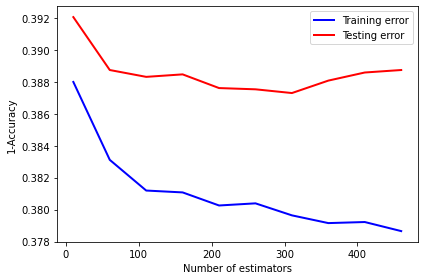

   No. estimators  Accuracy  F1 scores
0            10.0  0.607949   0.477299
1            60.0  0.611260   0.494298
2           110.0  0.611689   0.494727
3           160.0  0.611533   0.494524
4           210.0  0.612390   0.495793
5           260.0  0.612468   0.495792
6           310.0  0.612702   0.496250
7           360.0  0.611923   0.495083
8           410.0  0.611416   0.494142
9           460.0  0.611260   0.493990


In [121]:
lls_train = []
lls_test = []

max_ = 500
min_ = 10
sc_df = pd.DataFrame(columns = ['No. estimators', 'Accuracy', 'F1 scores'])
itr_range=range(min_, max_,50)

for h in itr_range:
    learning_rate=1
    adab = AdaBoostClassifier(n_estimators=h, learning_rate=learning_rate, random_state=0)
    
    adab = adab.fit(drop_neg_xx_train, drop_neg_yy_train)
    y_train_pred = adab.predict(drop_neg_xx_train)
    y_test_pred = adab.predict(drop_neg_xx_test)

    sc_df = sc_df.append({'No. estimators':h,'Accuracy':accuracy_score(drop_neg_yy_test, y_test_pred),'F1 scores':f1_score(drop_neg_yy_test, y_test_pred)},ignore_index=True)
    
    lls_train.append(1-adab.score(drop_neg_xx_train, drop_neg_yy_train))
    lls_test.append(1-adab.score(drop_neg_xx_test, drop_neg_yy_test))
    

plt.plot(itr_range, lls_train, label =b 'Training error', color = 'blue', linewidth = 2)
plt.plot(itr_range, lls_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Number of estimators')
plt.ylabel('1-Accuracy')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()
print(sc_df)

### SGD classifier

In [253]:
sc_df = pd.DataFrame(columns = ['Max_iter', 'Accuracy', 'F1 scores'])    
sgd = SGDClassifier(penalty="l2", max_iter=3,alpha=0.0004, random_state=0)
sgd.fit(drop_neg_xx_train, drop_neg_yy_train)
y_train_pred=sgd.predict(drop_neg_xx_train)
y_test_pred = sgd.predict(drop_neg_xx_test)

sc_df = sc_df.append({'Max_iter':3,'Accuracy':accuracy_score(drop_neg_yy_test, y_test_pred),'F1 scores':f1_score(drop_neg_yy_test, y_test_pred)},ignore_index=True)

print(sc_df)

   Max_iter  Accuracy  F1 scores
0       3.0  0.537697   0.618746


### XGBoost

In [185]:
sc_df = pd.DataFrame(columns = ['Alpha', 'Accuracy', 'F1 scores'])  
xg1 = XGBClassifier(eval_metric='logloss',max_depth=5,learning_rate=0.0001,min_child_weight=0.0001,alpha=4,random_state=0)
xg1=xg1.fit(drop_neg_xx_train, drop_neg_yy_train)
yy_pred=xg1.predict(drop_neg_xx_test)
sc_df = sc_df.append({'Alpha':4,'Accuracy':accuracy_score(drop_neg_yy_test, yy_pred),'F1 scores':f1_score(drop_neg_yy_test, yy_pred)},ignore_index=True)
print(sc_df)

   Alpha  Accuracy  F1 scores
0    4.0  0.611222   0.454754


# 3. Plot the error curve of your best model and tell if it is over-fit or not.

## Final Model

### Random Forest

It is not over-fit. But it is under-fit.

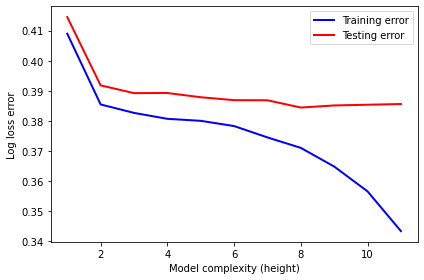

    Max height  Accuracy  F1 scores
0          1.0  0.585506   0.286902
1          2.0  0.608182   0.444297
2          3.0  0.610754   0.436675
3          4.0  0.610715   0.446329
4          5.0  0.612118   0.438870
5          6.0  0.613092   0.440689
6          7.0  0.613131   0.443909
7          8.0  0.615546   0.446079
8          9.0  0.614845   0.445628
9         10.0  0.614611   0.441975
10        11.0  0.614378   0.443081


In [119]:
lls_train = []
lls_test = []
sc_df = pd.DataFrame(columns = ['Max height', 'Accuracy', 'F1 scores'])

max_height = 12

for h in range(1, max_height):
    #gboosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1,max_depth=h, random_state=0)
    rfr = RandomForestClassifier(criterion='entropy',n_estimators=200,n_jobs=2,max_depth=h, random_state=0)
    rfr.fit(drop_neg_xx_train, drop_neg_yy_train)
    y_train_pred = rfr.predict(drop_neg_xx_train)
    y_test_pred = rfr.predict(drop_neg_xx_test)
    sc_df = sc_df.append({'Max height':h,'Accuracy':accuracy_score(drop_neg_yy_test, y_test_pred),'F1 scores':f1_score(drop_neg_yy_test, y_test_pred)},ignore_index=True)
    
    #lls_train.append(log_loss(drop_neg_yy_train, y_train_pred))
    #lls_test.append(log_loss(drop_neg_yy_test, yy_pred))
    lls_train.append(1-rfr.score(drop_neg_xx_train, drop_neg_yy_train))
    lls_test.append(1-rfr.score(drop_neg_xx_test, drop_neg_yy_test))
    

plt.plot(range(1, max_height), lls_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_height), lls_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (height)')
plt.ylabel('Log loss error')
plt.tight_layout()
plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

print(sc_df)

### Using brute force to features selection

In [210]:
sc_df = pd.DataFrame(columns = ['Selected features', 'Accuracy', 'F1 scores'])
best_sc_df = pd.DataFrame(columns = ['Selected features', 'Accuracy', 'F1 scores'])
best_accuracy=0
best_F1_score=0
xg1 = XGBClassifier(eval_metric='logloss',max_depth=5,learning_rate=0.0001,min_child_weight=0.0001,alpha=4,random_state=0)
for id_list in rSubset(range(8), 3):
    ida=array(id_list)
    sel_train_xx=drop_neg_xx_train.iloc[:,ida]
    sel_test_xx=drop_neg_xx_test.iloc[:,ida]
    gboosting_clf = xg1.fit(sel_train_xx, drop_neg_yy_train)
    yy_pred=gboosting_clf.predict(sel_test_xx)
    accuracy=accuracy_score(drop_neg_yy_test, yy_pred)
    f1=f1_score(drop_neg_yy_test, yy_pred)  
    if(best_accuracy<accuracy):
        best_accuracy=accuracy
        best_F1_score=f1
        best_select=id_list
    sc_df = sc_df.append({'Selected features':drop_neg_xx_train.columns.values[[id_list]],'Accuracy':accuracy,'F1 scores':f1},ignore_index=True)
print(sc_df)

best_sc_df=best_sc_df.append({'Selected features':drop_neg_xx_train.columns.values[[best_select]],'Accuracy':best_accuracy,'F1 scores':best_F1_score},ignore_index=True)
print(best_sc_df)

                           Selected features  Accuracy  F1 scores
0           [PERIOD, GAME_CLOCK, SHOT_CLOCK]  0.558036   0.237753
1             [PERIOD, GAME_CLOCK, DRIBBLES]  0.539801   0.017306
2           [PERIOD, GAME_CLOCK, TOUCH_TIME]  0.554802   0.224620
3            [PERIOD, GAME_CLOCK, SHOT_DIST]  0.604364   0.457585
4             [PERIOD, GAME_CLOCK, PTS_TYPE]  0.540074   0.042505
5       [PERIOD, GAME_CLOCK, CLOSE_DEF_DIST]  0.536918   0.062475
6             [PERIOD, SHOT_CLOCK, DRIBBLES]  0.558465   0.257502
7           [PERIOD, SHOT_CLOCK, TOUCH_TIME]  0.567076   0.319054
8            [PERIOD, SHOT_CLOCK, SHOT_DIST]  0.604754   0.442760
9             [PERIOD, SHOT_CLOCK, PTS_TYPE]  0.568907   0.286286
10      [PERIOD, SHOT_CLOCK, CLOSE_DEF_DIST]  0.558231   0.239673
11            [PERIOD, DRIBBLES, TOUCH_TIME]  0.555776   0.178780
12             [PERIOD, DRIBBLES, SHOT_DIST]  0.605533   0.460629
13              [PERIOD, DRIBBLES, PTS_TYPE]  0.568712   0.428520
14        

# 4. The top-3 features you find and how you find it .

TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST

Selecting by logistic regression, SelectKBest from scikitlearn and brute force.

In [ ]:
X_test = pd.read_csv('./data/X_test.csv')

In [256]:
sc_df = pd.DataFrame(columns = ['Max height', 'Accuracy', 'F1 scores'])
rfr = RandomForestClassifier(criterion='entropy',n_estimators=200,n_jobs=2,max_depth=8, random_state=0)
rfr.fit(drop_neg_xx_train, drop_neg_yy_train)
y_train_pred = rfr.predict(drop_neg_xx_train)
y_test_pred = rfr.predict(drop_neg_xx_test)
sc_df = sc_df.append({'Max height':8,'Accuracy':accuracy_score(drop_neg_yy_test, y_test_pred),'F1 scores':f1_score(drop_neg_yy_test, y_test_pred)},ignore_index=True)

### The results of my final model

In [257]:
sc_df

,Max height,Accuracy,F1 scores
0,8.0,0.615546,0.446079


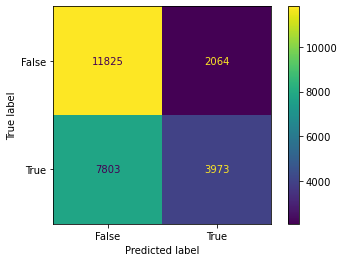

In [263]:
confusion_matrix=confusion_matrix(drop_neg_yy_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Predicting the given test data

In [272]:
final_y_test

array([1, 0, 1, ..., 0, 0, 0])

In [262]:
X_test.shape

(36751, 8)

In [258]:
final_y_test=rfr.predict(X_test)

In [265]:
pd.DataFrame(final_y_test).to_csv('Lab05_109065711_y_pred.csv', index=False) 

# 5. A brief report what you do in this assignment.

Downloading the NBA dataset and splitting it into training set and validation set.

I dropped the row with negative values in the dataset. Also, I checked if the 0 row exists.

I tried to use some datatransformation methods and One-Hot encoding method. However, the results are pretty much the same.

I used different classification models to train the data.

Including AdaBoostClassifier, SGDClassifier, XGBClassifier, RandomForestClassifier, LogisticRegression, SVM, and GradientBoostingClassifier.

Drawing the error curves of the training results with different parameters of the models.

Using logistic regression, scikitlearn module and brute force method to select the top-3 features.

Using my final model to show the prediction result and the confusion matrix.

Finally, I predicted X_test with my final model and hoped it can pass.